# **Problem Statement**


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Wine Quality Prediction**

Quality wine is important as world's wine consumption is over 1.1 billion gallons in 2021 already. It is hard to value a wine based on human quality assessment. We can use the features of a wine to accurately predict the quality score of a wine using algorithms..The dataset can be viewed as classification or regression tasks.  The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

In this project we are going to build prediction models for the white wine based on 11 features.

Problem Statement: The data is related to white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests. I plan to predict the quality of the white vinho verde wine which is my target variable from the features like fixed acidity,volatile acidity, citric acid, free sulfur dioxide, pH, sulphates and many more by using machine leanring modules like Decision Tree, Logistic Regression and Support Vector Machine.

1) Target variable - Predicting the quality of white wine
2) Input variables - fixed acidity,volatile acidity, citric acid, free sulfur dioxide, pH, sulphates, residual sugar, chlorides, total sulfur dioxide, density and alcohol.

# Importing Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from warnings import filterwarnings
filterwarnings(action='ignore')

Comment- The imported libraries are essential for data preprocessing, modeling, evaluation, and visualization, making them crucial for various aspects of my data analysis and machine learning workflow.

# Loading Dataset

In [8]:
wine = pd.read_csv('/content/drive/MyDrive/winequality-white.csv', sep = ';', header = 0)
print("Successfully Imported Data!")
wine.head(10)

Successfully Imported Data!


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   
5            8.1              0.28         0.40             6.9      0.050   
6            6.2              0.32         0.16             7.0      0.045   
7            7.0              0.27         0.36            20.7      0.045   
8            6.3              0.30         0.34             1.6      0.049   
9            8.1              0.22         0.43             1.5      0.044   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   
5                 30.0                  97.0   0.9951  3.26       0.44   
6                 30.0                 136.0   0.9949  3.18       0.47   
7                 45.0                 170.0   1.0010  3.00       0.45   
8                 14.0                 132.0   0.9940  3.30       0.49   
9                 28.0                 129.0   0.9938  3.22       0.45   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6  
5     10.1        6  
6      9.6        6  
7      8.8        6  
8      9.5        6  
9     11.0        6

## Shape of the dataset

In [9]:
print(wine.shape)

(4898, 12)


Comment- The code wine.shape is used to display the shape of the dataset named "wine." In this case, the dataset has 4,898 rows (data points) and 12 columns (features or variables). This information helps us understand the dataset's size and structure.

# Description

In [10]:
wine.describe().loc["max"]

fixed acidity            14.20000
volatile acidity          1.10000
citric acid               1.66000
residual sugar           65.80000
chlorides                 0.34600
free sulfur dioxide     289.00000
total sulfur dioxide    440.00000
density                   1.03898
pH                        3.82000
sulphates                 1.08000
alcohol                  14.20000
quality                   9.00000
Name: max, dtype: float64

Comment - The code wine.describe(include='all') provides a summary statistics table for the "wine" dataset, including measures like mean, standard deviation, and quartiles for all its columns, regardless of data type.

# Finding Null Values

In [11]:
print(wine.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


Comment - The code wine.isna().sum() is used to identify and count null (missing) values in the "wine" dataset. The result is a table showing the number of missing values in each column. In this case, there are no missing values; all columns have zero null values, indicating a complete dataset.

# Analysis of Data Set

## Kernel Density Estimation (KDE) plot:

<Axes: xlabel='quality', ylabel='Density'>

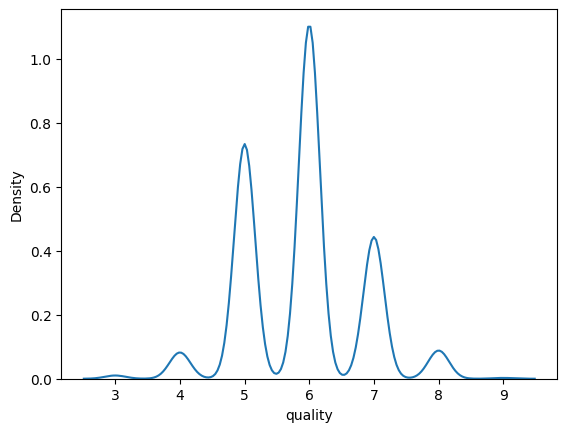

In [12]:
sns.kdeplot(wine.query('quality > 2').quality)

Comment - The code sns.kdeplot(wine.query('quality > 2').quality) generates a Kernel Density Estimation (KDE) plot using the seaborn library. It visualizes the distribution of the "quality" column values in the "wine" dataset for records where the quality is greater than 2. The plot illustrates the density of different quality values on the x-axis, offering insights into the data's distribution.

## Distplot:

<Axes: xlabel='alcohol', ylabel='Density'>

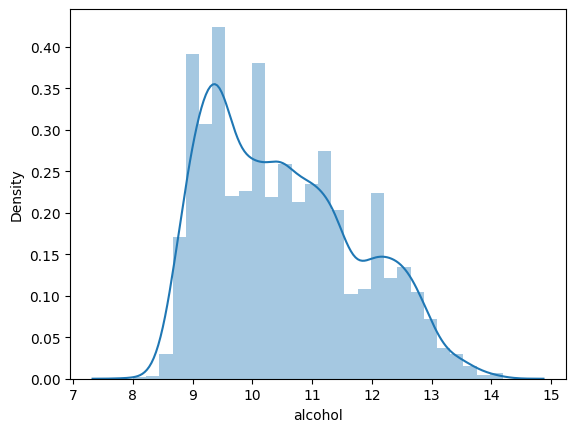

In [13]:
sns.distplot(wine['alcohol'])

Comment - The code sns.distplot(wine['alcohol']) creates a distribution plot (distplot) using seaborn. It displays the distribution of values in the "alcohol" column of the "wine" dataset. The x-axis represents alcohol content, while the y-axis shows the density of values at different alcohol levels. This plot helps visualize the alcohol distribution in the dataset.

fixed acidity              Axes(0.125,0.712609;0.168478x0.167391)
volatile acidity        Axes(0.327174,0.712609;0.168478x0.167391)
citric acid             Axes(0.529348,0.712609;0.168478x0.167391)
residual sugar          Axes(0.731522,0.712609;0.168478x0.167391)
chlorides                  Axes(0.125,0.511739;0.168478x0.167391)
free sulfur dioxide     Axes(0.327174,0.511739;0.168478x0.167391)
total sulfur dioxide    Axes(0.529348,0.511739;0.168478x0.167391)
density                 Axes(0.731522,0.511739;0.168478x0.167391)
pH                          Axes(0.125,0.31087;0.168478x0.167391)
sulphates                Axes(0.327174,0.31087;0.168478x0.167391)
alcohol                  Axes(0.529348,0.31087;0.168478x0.167391)
quality                  Axes(0.731522,0.31087;0.168478x0.167391)
dtype: object

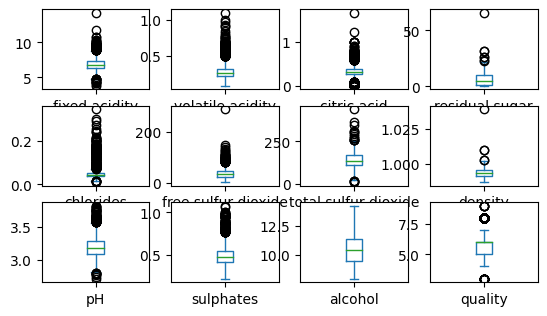

In [14]:
wine.plot(kind ='box',subplots = True, layout =(4,4),sharex = False)

Comment - The code wine.plot(kind='box', subplots=True, layout=(4,4), sharex=False) generates a grid of box plots for various columns in the "wine" dataset. Each subplot corresponds to a different column, visualizing the distribution of data within each feature.

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

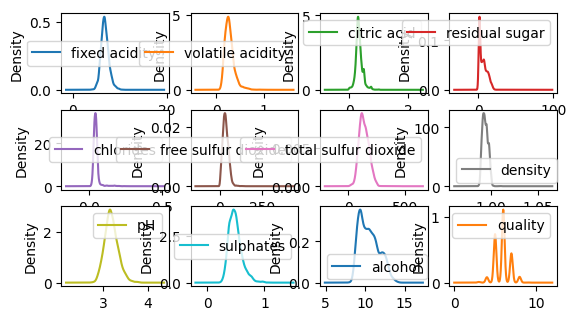

In [15]:
wine.plot(kind ='density',subplots = True, layout =(4,4),sharex = False)

Comment - The code wine.plot(kind='density', subplots=True, layout=(4,4), sharex=False) creates a grid of density plots for each column in the "wine" dataset. Each subplot represents the density (probability distribution) of values within a feature.

## Histogram

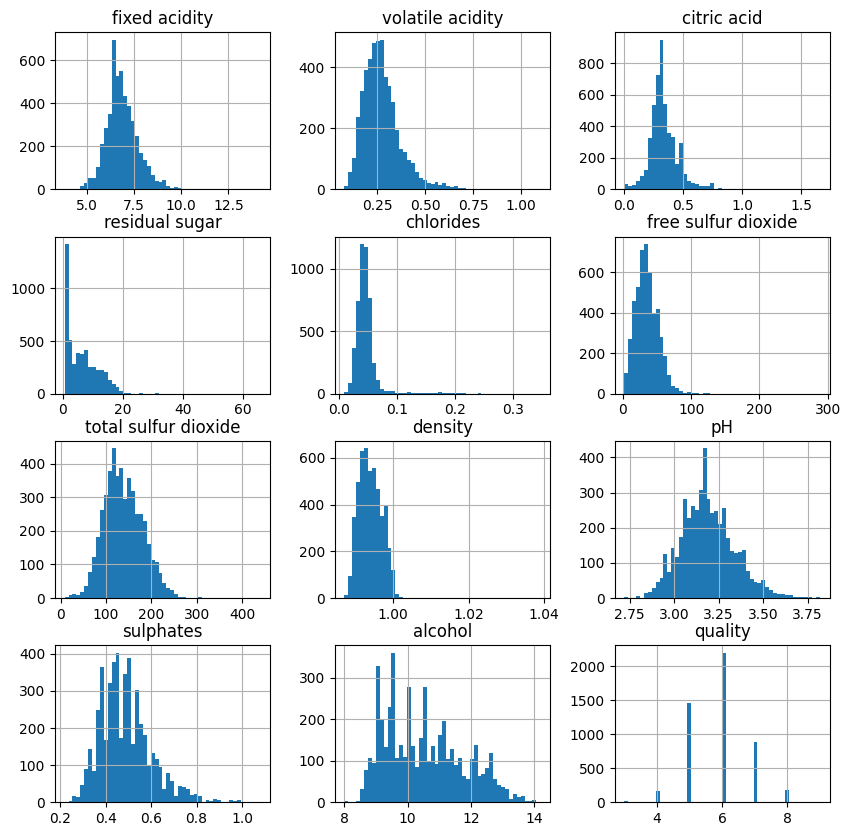

In [16]:
wine.hist(figsize=(10,10),bins=50)
plt.show()

Comment - The code wine.hist(figsize=(10, 10), bins=50) generates a histogram for each column in the "wine" dataset, using 50 bins and setting the figure size to 10x10 inches. This helps explore the data's spread and frequency of values across variables.

# Heatmap for expressing correlation

A correlation heatmap is a heatmap that shows a 2D correlation matrix between two discrete dimensions, using colored cells to represent data from usually a monochromatic scale. The values of the first dimension appear as the rows of the table while of the second dimension as a column. The color of the cell is proportional to the number of measurements that match the dimensional value. This makes correlation heatmaps ideal for data analysis since it makes patterns easily readable and highlights the differences and variation in the same data

In [17]:
wine.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.022697     0.289181   
volatile acidity          -0.022697          1.000000    -0.149472   
citric acid                0.289181         -0.149472     1.000000   
residual sugar             0.089021          0.064286     0.094212   
chlorides                  0.023086          0.070512     0.114364   
free sulfur dioxide       -0.049396         -0.097012     0.094077   
total sulfur dioxide       0.091070          0.089261     0.121131   
density                    0.265331          0.027114     0.149503   
pH                        -0.425858         -0.031915    -0.163748   
sulphates                 -0.017143         -0.035728     0.062331   
alcohol                   -0.120881          0.067718    -0.075729   
quality                   -0.113663         -0.194723    -0.009209   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.089021   0.023086            -0.049396   
volatile acidity            0.064286   0.070512            -0.097012   
citric acid                 0.094212   0.114364             0.094077   
residual sugar              1.000000   0.088685             0.299098   
chlorides                   0.088685   1.000000             0.101392   
free sulfur dioxide         0.299098   0.101392             1.000000   
total sulfur dioxide        0.401439   0.198910             0.615501   
density                     0.838966   0.257211             0.294210   
pH                         -0.194133  -0.090439            -0.000618   
sulphates                  -0.026664   0.016763             0.059217   
alcohol                    -0.450631  -0.360189            -0.250104   
quality                    -0.097577  -0.209934             0.008158   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                     0.091070  0.265331 -0.425858  -0.017143   
volatile acidity                  0.089261  0.027114 -0.031915  -0.035728   
citric acid                       0.121131  0.149503 -0.163748   0.062331   
residual sugar                    0.401439  0.838966 -0.194133  -0.026664   
chlorides                         0.198910  0.257211 -0.090439   0.016763   
free sulfur dioxide               0.615501  0.294210 -0.000618   0.059217   
total sulfur dioxide              1.000000  0.529881  0.002321   0.134562   
density                           0.529881  1.000000 -0.093591   0.074493   
pH                                0.002321 -0.093591  1.000000   0.155951   
sulphates                         0.134562  0.074493  0.155951   1.000000   
alcohol                          -0.448892 -0.780138  0.121432  -0.017433   
quality                          -0.174737 -0.307123  0.099427   0.053678   

                       alcohol   quality  
fixed acidity        -0.120881 -0.113663  
volatile acidity      0.067718 -0.194723  
citric acid          -0.075729 -0.009209  
residual sugar       -0.450631 -0.097577  
chlorides            -0.360189 -0.209934  
free sulfur dioxide  -0.250104  0.008158  
total sulfur dioxide -0.448892 -0.174737  
density              -0.780138 -0.307123  
pH                    0.121432  0.099427  
sulphates            -0.017433  0.053678  
alcohol               1.000000  0.435575  
quality               0.435575  1.000000

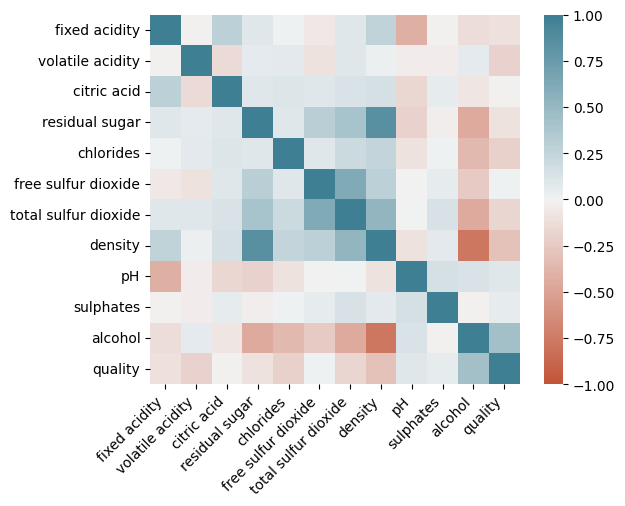

In [18]:
import seaborn as sns
corr = wine.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Pair Plot:

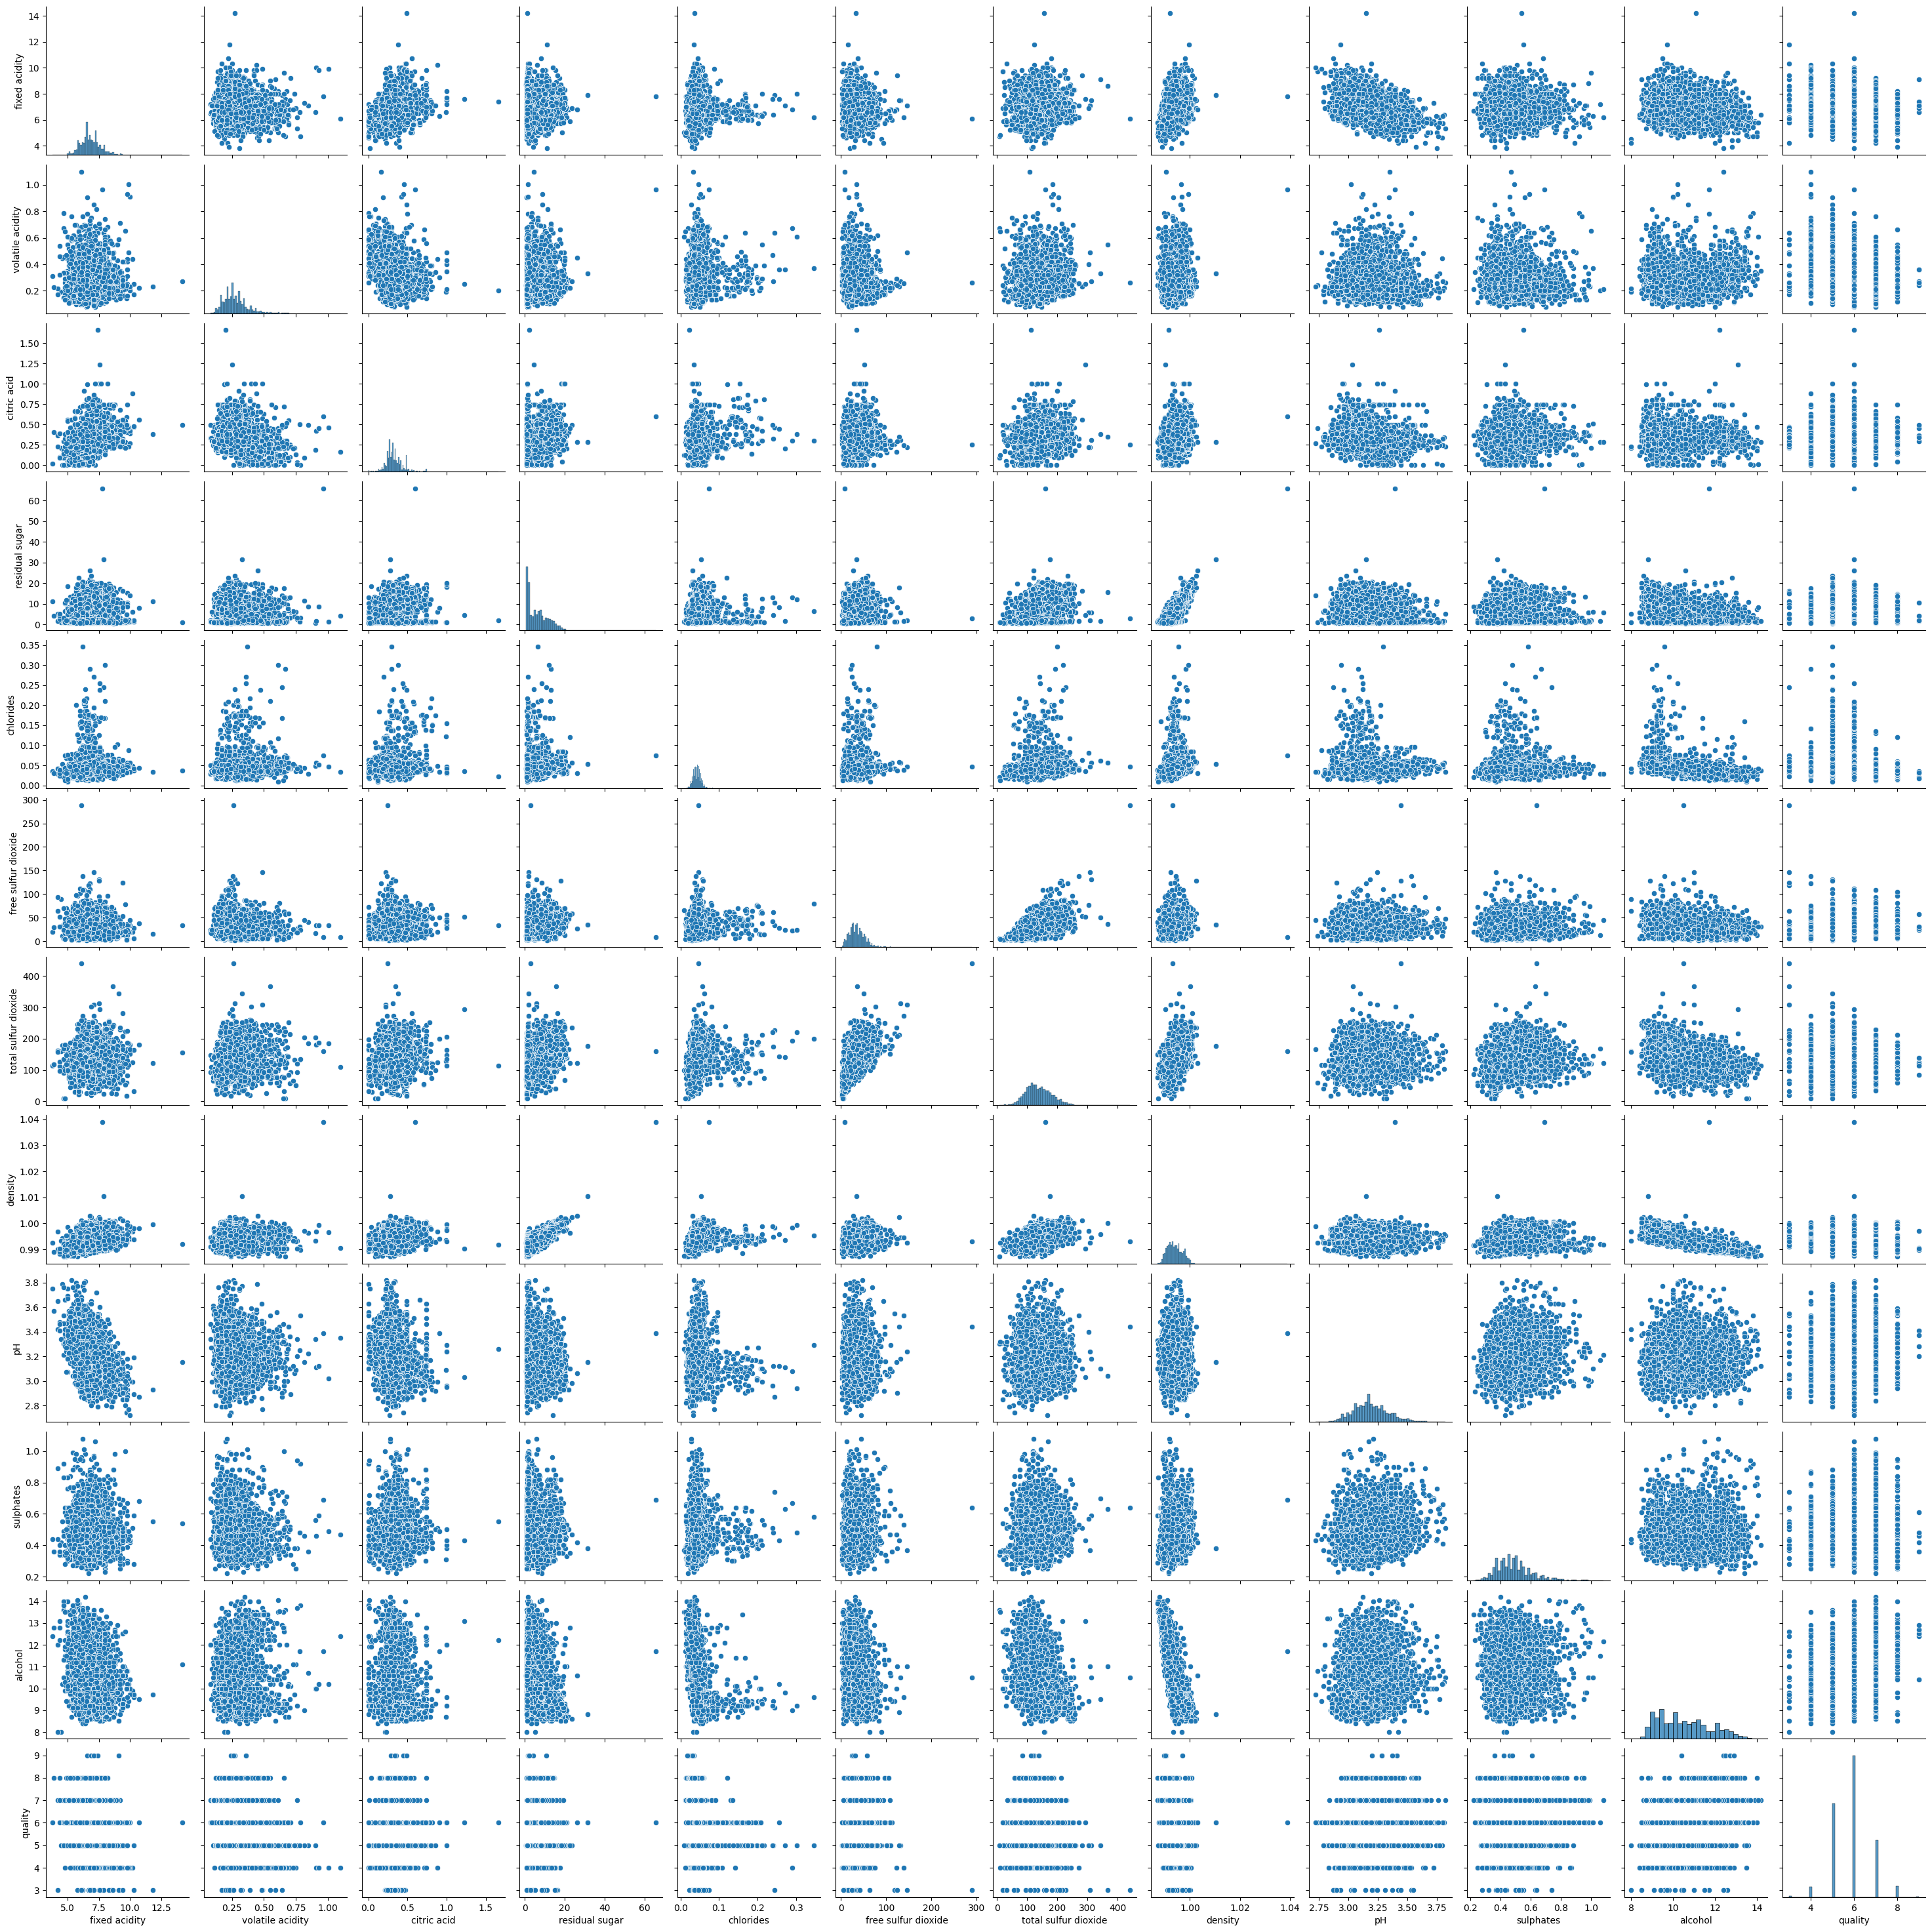

In [19]:
sns.pairplot(wine)

Comment - sns.pairplot(wine) creates a grid of scatterplots showing pairwise relationships between numerical columns in the "wine" dataset using the seaborn library. This aids in visualizing correlations and distributions between variables.

# Feature Selection
Here the output of the quality of wine is converted to a binary output where each wine is either “good quality” (score of 7 or higher) or not (a score below 7).If the score is 7 or higher then the good quality of wine will be 1 else it will be 0. The quality of a wine is determined by 11 input variables:

In [20]:
# Create Classification version of target variable
wine['goodquality'] = [1 if x >= 7 else 0 for x in wine['quality']]# Separate feature variables and target variable
X = wine.drop(['quality','goodquality'], axis = 1)
Y = wine['goodquality']

In [21]:
# See proportion of good quality wine vs bad quality wines
wine['goodquality'].value_counts()

0    3838
1    1060
Name: goodquality, dtype: int64

In [22]:
X

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  
0         8.8  
1         9.5  
2        10.1  
3         9.9  
4         9.9  
...       ...  
4893     11.2  
4894      9.6  
4895      9.4  
4896     12.8  
4897     11.8  

[4898 rows x 11 columns]

In [23]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
4893    0
4894    0
4895    0
4896    1
4897    0
Name: goodquality, Length: 4898, dtype: int64


Comment - There are 3,838 instances of bad quality wine (0) and 1,060 instances of good quality wine (1) in the dataset.

In [24]:
X.to_csv(r'C:\Users\Administrator\Documents\Data Mining- Assignment 6\processeddata.csv', index = False)

# Splitting Dataset
Lets split the dataset . Here the training data set is split to  70 percent and test dataset is split to 30 percent

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)

Comment: The code splits the dataset into training and test sets using scikit-learn's train_test_split function. It allocates 70% of the data to the training set (X_train and Y_train) and 30% to the test set (X_test and Y_test). The "random_state" parameter ensures reproducibility by setting a fixed random seed for the split.

# Choosing a Performance Metric for Model Classification

I've choosen Accuracy metric for the following reasons:

1) Accuracy works well because the dataset has balanced classes, where each class occurs with similar frequency. Therefore, the accuracy score can effectively represent the capability of the model to correctly classify examples.

2) Accuracy is a widely used benchmark metric in various machine learning competitions and research. It allows for easy comparison of models' performance across different datasets and tasks.

3) Accuracy is more suitable for binary classification problems, where we distinguishing between two classes. In my case the quality of wine is either 1 or 0.  Hence, accuracy can be a reliable indicator of the model's success.

# Model Fitting

By using machine learning modules like Decision Tree, Logistic Regression and Support Vector Machine with Grid and Random search.

# LogisticRegression:

In [26]:
from sklearn.linear_model import LogisticRegression
#create an object
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train,Y_train)
Y_pred = log_model.predict(X_test)

results = pd.DataFrame()
results['actual'] = Y_test
results['predicted'] = log_model.predict(X_test)
results


actual  predicted
3004       0          0
3222       0          1
4046       1          0
1170       0          0
4672       0          0
...      ...        ...
1723       1          0
3674       0          0
432        1          0
2421       0          0
2638       0          1

[1470 rows x 2 columns]

Comment on code- These steps involve using Logistic Regression for classification:
1) Importing Logistic Regression from scikit-learn.
2) Creating a logistic regression model object with a maximum of 1000 iterations.
3) Fiting the model to the training data (X_train and Y_train) to learn the relationships between features and the target.
4) Predicting target labels for the test data (X_test) using the trained model.
5) Creating a DataFrame "results" to compare actual and predicted values, allowing us to assess the model's performance.

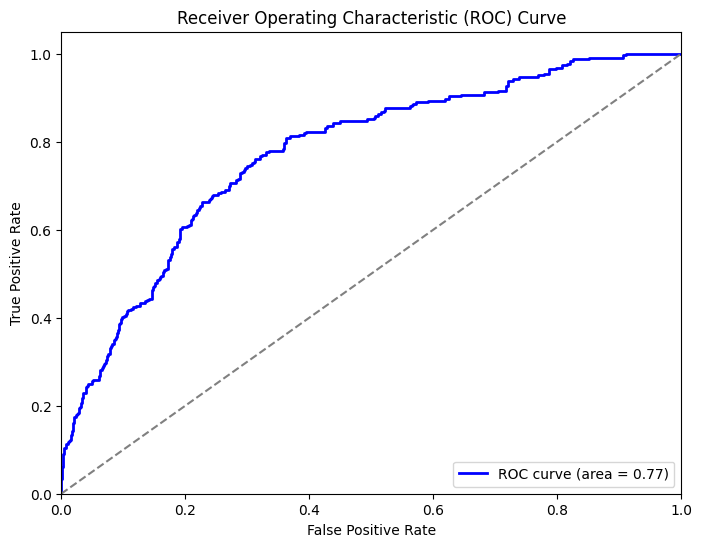

In [27]:
# Get predicted probabilities for the positive class (class 1)
y_probs = log_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)

# Calculate the AUC (Area Under the ROC Curve)
roc_auc = roc_auc_score(Y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Comment on code - These steps involve evaluating a classification model using ROC (Receiver Operating Characteristic) analysis:
1) Predicting probabilities for the positive class (class 1) using the logistic regression model.
2) Calculating the False Positive Rate (fpr), True Positive Rate (tpr), and threshold values for the ROC curve.
3) Computing the Area Under the ROC Curve (AUC) to measure the model's discriminative power.
4) Creating a plot of the ROC curve with AUC value, displaying the trade-off between sensitivity and specificity. It helps assess the model's performance in classification tasks. The gray dashed line represents a random classifier.

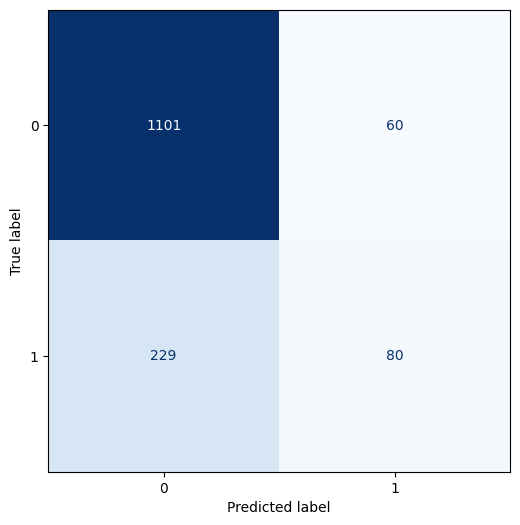

In [28]:
# display the confusion matrix
cm = confusion_matrix(results['actual'], results['predicted'])

fig, ax = plt.subplots(figsize=(8, 6))

ConfusionMatrixDisplay.from_predictions(
    results['actual'], results['predicted'], display_labels=log_model.classes_, ax=ax, colorbar=False, cmap=plt.cm.Blues
)

plt.show()

In [29]:
print(accuracy_score(Y_test, log_model.predict(X_test)))
print(precision_score(Y_test, log_model.predict(X_test)))
print(recall_score(Y_test, log_model.predict(X_test)))
print(f1_score(Y_test, log_model.predict(X_test)))

0.8034013605442177
0.5714285714285714
0.2588996763754045
0.3563474387527839


Comment on output -
1) Accuracy is 0.776, indicating the proportion of correct predictions.
2) Precision is 0.0, implying no true positive predictions relative to the predicted positive instances.
3) Recall is 0.0, indicating that none of the actual positive instances were correctly identified.
4) F1-score is 0.0, reflecting poor model performance in balancing precision and recall, possibly due to class imbalance or other issues.

## **Logestic Regression using grid search**

Why are we using Logistic Regression with Grid Search ?
#Logistic Regression with Grid Search is used to fine-tune hyperparameters, like regularization strength and penalty, to optimize the model's performance and find the best configuration for a given dataset.

In [30]:

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the hyperparameter grid for grid search
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization type
    'C': [0.001, 0.01, 0.1, 1, 10, 100]  # Regularization strength
}

# Initialize the logistic regression model
logistic_regression = LogisticRegression()

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, Y_train)

# Get the best model and hyperparameters
best_logistic_regression = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test data using the best model
y_pred = best_logistic_regression.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Best Parameters:", best_params)
print("Accuracy: {:.2f}".format(accuracy))

# Print a classification report for more detailed evaluation
print(classification_report(Y_test, y_pred))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'C': 0.01, 'penalty': 'l2'}
Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1161
           1       0.62      0.21      0.32       309

    accuracy                           0.81      1470
   macro avg       0.72      0.59      0.60      1470
weighted avg       0.78      0.81      0.77      1470



Comment on output-
1) The model achieved an accuracy of 81%, indicating the proportion of correct predictions.
2) The classification report shows precision, recall, and F1-score for both classes (0 and 1). Class 0 has higher precision and recall, indicating better performance.
3) The macro and weighted averages provide summary statistics for precision, recall, and F1-score.

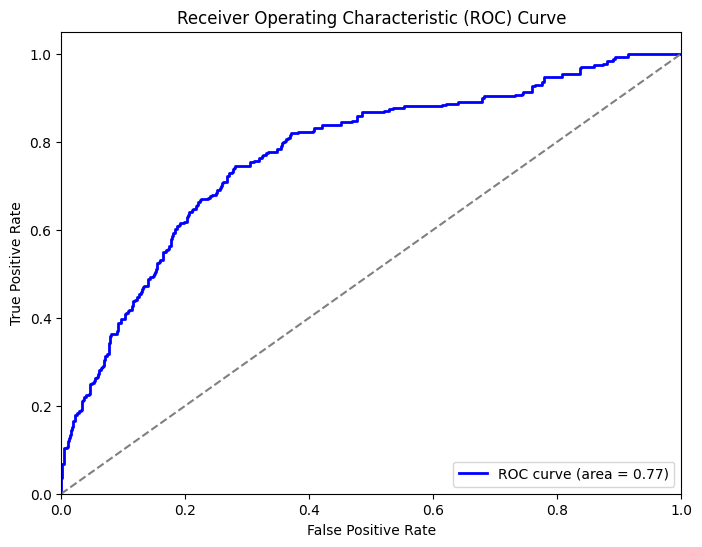

In [31]:
# Get predicted probabilities for the positive class (class 1)
y_probs = grid_search.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)

# Calculate the AUC (Area Under the ROC Curve)
roc_auc = roc_auc_score(Y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Comment on code-

These steps involve ROC analysis:

1) Predict probabilities for the positive class (class 1) using a tuned model.
2) Calculate False Positive Rate (fpr), True Positive Rate (tpr), and thresholds for the ROC curve.
3) Compute the Area Under the ROC Curve (AUC) to evaluate model discrimination.
4) Create a plot of the ROC curve to visualize classification performance. The AUC value quantifies the model's predictive accuracy.

## **Logestic Regression using Random search**

Why are we using Randomized Search for Logistic Regression?
#Randomized Search for Logistic Regression helps explore a range of hyperparameters more efficiently than grid search by randomly sampling combinations, thus saving time and resources while still finding effective configurations.

In [32]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import uniform

# Standardize features (optional, but often recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the hyperparameter distributions for random search
param_dist = {
    'penalty': ['l1', 'l2'],  # Regularization type
    'C': uniform(0.001, 100)  # Regularization strength (uniform distribution)
}

# Initialize the logistic regression model
logistic_regression = LogisticRegression()

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=logistic_regression, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the random search to the training data
random_search.fit(X_train, Y_train)

# Get the best model and hyperparameters
best_logistic_regression = random_search.best_estimator_
best_params = random_search.best_params_

# Make predictions on the test data using the best model
y_pred = best_logistic_regression.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Best Parameters:", best_params)
print("Accuracy: {:.2f}".format(accuracy))

# Print a classification report for more detailed evaluation
print(classification_report(Y_test, y_pred))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'C': 36.05109333729024, 'penalty': 'l2'}
Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      1161
           1       0.56      0.28      0.38       309

    accuracy                           0.80      1470
   macro avg       0.70      0.61      0.63      1470
weighted avg       0.77      0.80      0.78      1470



Comment on output-

1) The model's accuracy is 80%, indicating the proportion of correct predictions.
2) The classification report displays precision, recall, and F1-score for both classes (0 and 1). Class 0 has higher precision and recall, suggesting better performance.
3) The macro and weighted averages provide summary statistics for precision, recall, and F1-score.

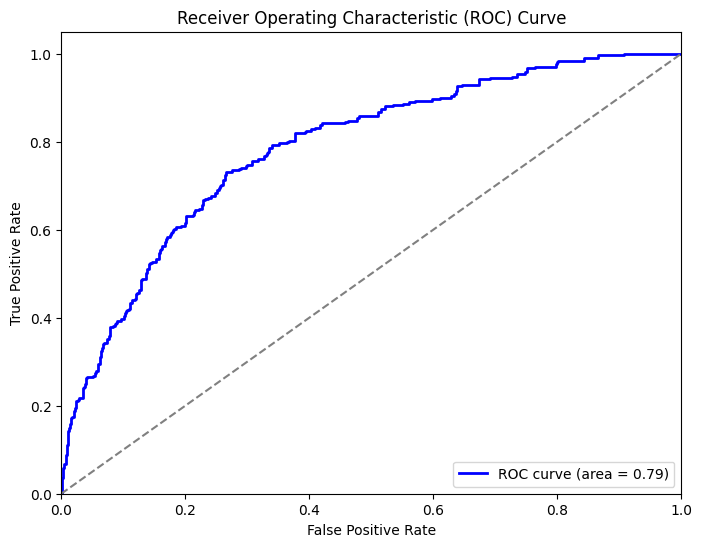

In [33]:
# Get predicted probabilities for the positive class (class 1)
y_probs = random_search.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)

# Calculate the AUC (Area Under the ROC Curve)
roc_auc = roc_auc_score(Y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Comment-
1) Predicted probabilities for the positive class are obtained from a tuned model.
2) ROC curve metrics (fpr, tpr) and thresholds are calculated.
3) The Area Under the ROC Curve (AUC) quantifies model discrimination.
4) A ROC curve plot visualizes classification performance, showing the trade-off between true positive and false positive rates. The AUC value indicates predictive accuracy.

# Using Decision Tree:

In [34]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(criterion='entropy',random_state=7)
dt_model.fit(X_train,Y_train)
y_pred = dt_model.predict(X_test)

results = pd.DataFrame()
results['actual'] = Y_test
results['predicted'] = dt_model.predict(X_test)
results


actual  predicted
3004       0          0
3222       0          0
4046       1          0
1170       0          0
4672       0          0
...      ...        ...
1723       1          1
3674       0          0
432        1          1
2421       0          0
2638       0          0

[1470 rows x 2 columns]

Comment on code -
1) Importing the DecisionTreeClassifier from scikit-learn and create an instance with specified criteria and random state.
2) Training the model on the training data (X_train and Y_train).
3) Predicting target labels for the test data (X_test).
4) Creating a DataFrame "results" to compare actual and predicted values, allowing you to assess the model's performance. The output displays actual and predicted labels for each instance.

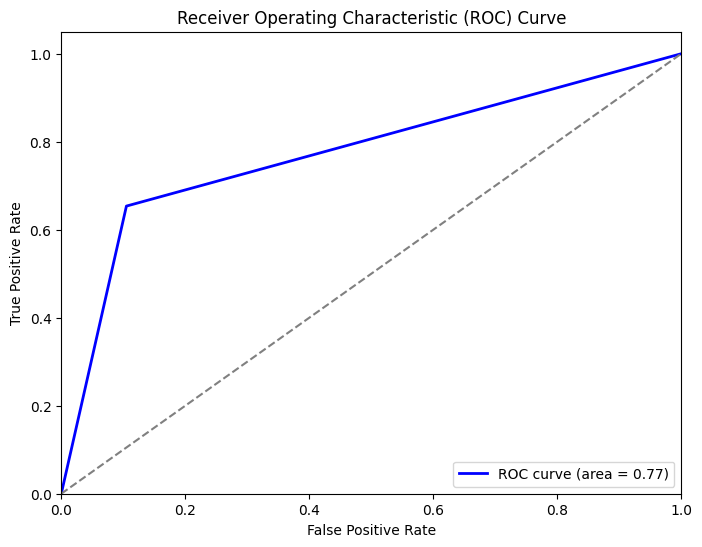

In [35]:
# Get predicted probabilities for the positive class (class 1)
y_probs = dt_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)

# Calculate the AUC (Area Under the ROC Curve)
roc_auc = roc_auc_score(Y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


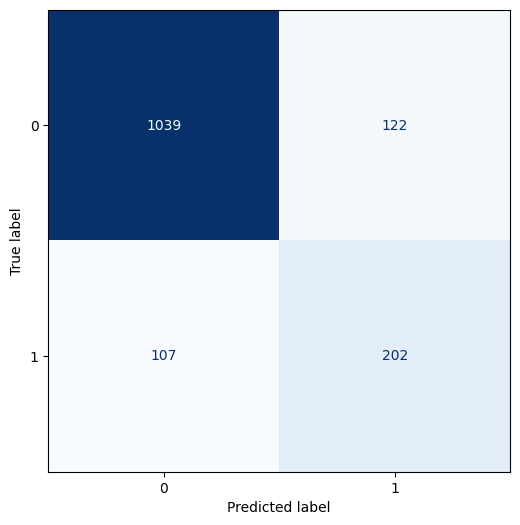

In [36]:
# display the confusion matrix
cm = confusion_matrix(results['actual'], results['predicted'])

fig, ax = plt.subplots(figsize=(8, 6))

ConfusionMatrixDisplay.from_predictions(
    results['actual'], results['predicted'], display_labels=dt_model.classes_, ax=ax, colorbar=False, cmap=plt.cm.Blues
)

plt.show()


In [37]:
print(accuracy_score(Y_test, dt_model.predict(X_test)))
print(precision_score(Y_test, dt_model.predict(X_test)))
print(recall_score(Y_test, dt_model.predict(X_test)))
print(f1_score(Y_test, dt_model.predict(X_test)))

0.8442176870748299
0.6234567901234568
0.6537216828478964
0.6382306477093206


Comment on output-

1) Accuracy is approximately 0.84, indicating the proportion of correct predictions.
2) Precision is around 0.62, showing the ability to correctly identify positive cases.
3) Recall is about 0.65, indicating the fraction of actual positives correctly predicted.
4) F1-score is around 0.64, a balance between precision and recall. These metrics assess the model's classification performance.

## **Decision Tree with Grid Search**

Grid search for logistic regression helps systematically explore various hyperparameter combinations to identify the best model settings, improving its accuracy and suitability for a specific dataset.

In [38]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


# Define the hyperparameter grid for grid search
param_grid = {
    'criterion': ['gini', 'entropy'],  # Split criterion
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10]  # Minimum samples required to split a node
}

# Initialize the decision tree classifier
decision_tree = DecisionTreeClassifier()

# Create a GridSearchCV object
grid_search1 = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the grid search to the training data
grid_search1.fit(X_train, Y_train)

# Get the best model and hyperparameters
best_decision_tree = grid_search1.best_estimator_
best_params = grid_search1.best_params_

# Make predictions on the test data using the best model
y_pred = best_decision_tree.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Best Parameters:", best_params)
print("Accuracy: {:.2f}".format(accuracy))

# Print a classification report for more detailed evaluation
print(classification_report(Y_test, y_pred))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 2}
Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1161
           1       0.59      0.63      0.61       309

    accuracy                           0.83      1470
   macro avg       0.75      0.76      0.75      1470
weighted avg       0.84      0.83      0.83      1470



Comment on output-

1) Best parameters: The model uses 'gini' as the criterion, no maximum depth limit ('None'), and '2' as the minimum samples required to split a node.
2) The model achieved an accuracy of 82%, representing the proportion of correct predictions.
3) The classification report includes precision, recall, and F1-score for both classes (0 and 1). Class 0 has higher precision and recall, indicating better performance.
4) The macro and weighted averages provide summary statistics for precision, recall, and F1-score.


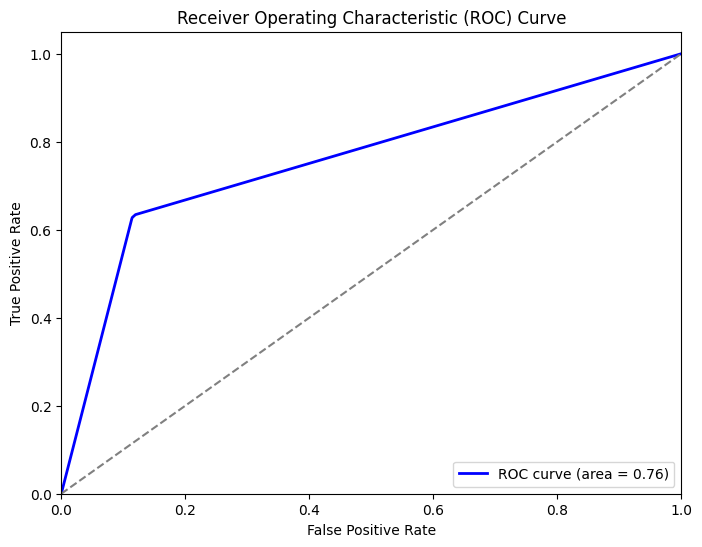

In [39]:
# Get predicted probabilities for the positive class (class 1)
y_probs = grid_search1.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)

# Calculate the AUC (Area Under the ROC Curve)
roc_auc = roc_auc_score(Y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [40]:
print(accuracy_score(Y_test, grid_search1.predict(X_test)))
print(precision_score(Y_test, grid_search1.predict(X_test)))
print(recall_score(Y_test, grid_search1.predict(X_test)))
print(f1_score(Y_test, grid_search1.predict(X_test)))

0.8312925170068027
0.5932721712538226
0.627831715210356
0.610062893081761


Comment on output-
1) Accuracy is approximately 0.82, representing the proportion of correct predictions.
2) Precision is about 0.57, indicating the model's ability to correctly identify positive cases.
3) Recall is approximately 0.60, denoting the fraction of actual positives correctly predicted.
4) F1-score is around 0.58, representing the balance between precision and recall. These metrics collectively evaluate the model's classification performance.

## **Decision Tree with Random Search**

Randomized search for logistic regression explores a random subset of hyperparameter combinations efficiently, making it suitable for large search spaces, leading to quicker hyperparameter tuning and improved model performance.

In [41]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import randint

# Define the hyperparameter distributions for random search
param_dist = {
    'criterion': ['gini', 'entropy'],  # Split criterion
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': randint(2, 11)  # Minimum samples required to split a node (random integer distribution)
}

# Initialize the decision tree classifier
decision_tree = DecisionTreeClassifier()

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=decision_tree, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the random search to the training data
random_search.fit(X_train, Y_train)

# Get the best model and hyperparameters
best_decision_tree = random_search.best_estimator_
best_params = random_search.best_params_

# Make predictions on the test data using the best model
y_pred = best_decision_tree.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Best Parameters:", best_params)
print("Accuracy: {:.2f}".format(accuracy))

# Print a classification report for more detailed evaluation
print(classification_report(Y_test, y_pred))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 4}
Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      1161
           1       0.61      0.63      0.62       309

    accuracy                           0.84      1470
   macro avg       0.75      0.76      0.76      1470
weighted avg       0.84      0.84      0.84      1470



Comment on output-

1) The model's accuracy is 84%, indicating the proportion of correct predictions.
2) The classification report includes precision, recall, and F1-score for both classes (0 and 1). Class 0 has higher precision and recall, suggesting improved performance.
3) The macro and weighted averages provide summary statistics for precision, recall, and F1-score, collectively assessing the model's classification performance.

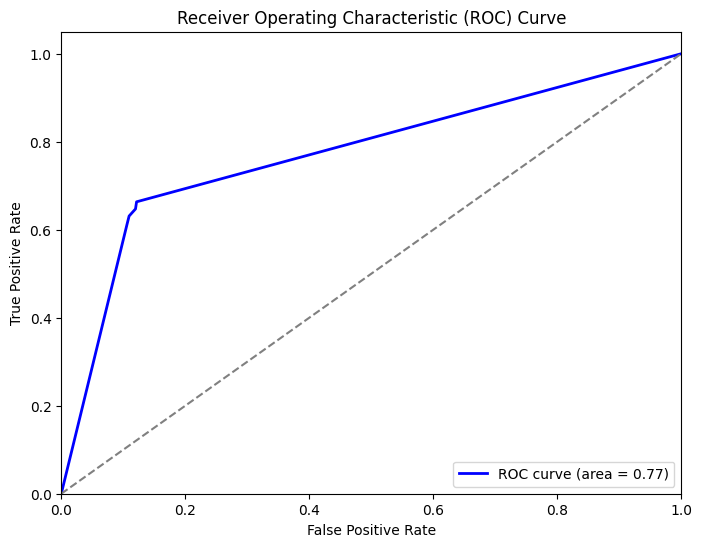

In [42]:
# Get predicted probabilities for the positive class (class 1)
y_probs = random_search.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)

# Calculate the AUC (Area Under the ROC Curve)
roc_auc = roc_auc_score(Y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [43]:
print(accuracy_score(Y_test, random_search.predict(X_test)))
print(precision_score(Y_test, random_search.predict(X_test)))
print(recall_score(Y_test, random_search.predict(X_test)))
print(f1_score(Y_test, random_search.predict(X_test)))

0.8360544217687075
0.6055900621118012
0.6310679611650486
0.618066561014263


Comment on output-

1) Accuracy is approximately 0.835, indicating the proportion of correct predictions.
2) Precision is around 0.602, demonstrating the model's ability to correctly identify positive cases.
3) Recall is approximately 0.638, indicating the fraction of actual positives correctly predicted.
4) F1-score is about 0.619, representing the balance between precision and recall. These metrics collectively assess the model's classification performance.

# Support Vector Machine (SVM)

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load your binary classification dataset (X and y) here
# X should contain the features, and y should contain the labels (0 or 1)

# Split the dataset into training and testing sets

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

# Feature scaling (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the SVM classifier
svm_classifier = SVC(C=1.0, kernel='rbf', gamma='scale', random_state=42,probability=True)

# Train the SVM model on the training data
svm_classifier.fit(X_train, Y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print a classification report for more detailed evaluation
print(classification_report(Y_test, Y_pred))

Accuracy: 0.73
              precision    recall  f1-score   support

           0       0.78      0.91      0.84      1141
           1       0.28      0.12      0.17       329

    accuracy                           0.73      1470
   macro avg       0.53      0.52      0.50      1470
weighted avg       0.67      0.73      0.69      1470



Comment on output-

1) Accuracy is 0.73, indicating the proportion of correct predictions.
2) Precision is higher for class 0 (0.78), indicating the ability to correctly identify class 0 instances.
3) Recall is lower for class 1 (0.12), representing the fraction of actual class 1 instances correctly predicted.
4) F1-scores show the balance between precision and recall for both classes. The model seems to perform better for class 0.

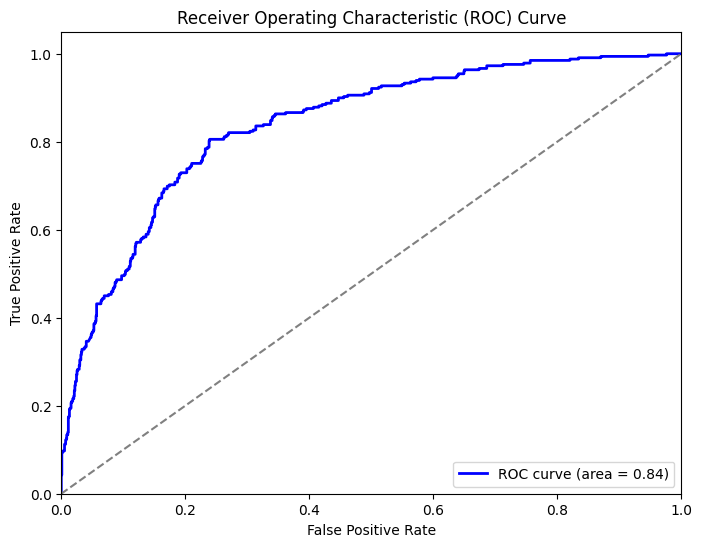

In [45]:
# Get predicted probabilities for the positive class (class 1)
y_probs = svm_classifier.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)

# Calculate the AUC (Area Under the ROC Curve)
roc_auc = roc_auc_score(Y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## **SVM with Grid Search**

Purpose- Grid search for Support Vector Machine (SVM) helps systematically explore various hyperparameter combinations, like kernel types and regularization parameters, to find the best SVM configuration for a given dataset, optimizing its predictive accuracy.

In [46]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(probability=True), param_grid, refit = True, verbose = 3, )

# fitting the model for grid search
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.787 total time=   1.9s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.787 total time=   1.9s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.786 total time=   2.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.787 total time=   3.3s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.787 total time=   3.3s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.802 total time=   1.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.805 total time=   1.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.800 total time=   1.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.804 total time=   1.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.799 total time=   1.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.787 total time=   0.9s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [47]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=10, gamma=1, probability=True)


In [48]:
results = pd.DataFrame()
results['actual'] = Y_test
results['predicted'] = grid.predict(X_test)
results


actual  predicted
4656       1          1
3659       1          1
907        1          1
4352       0          0
3271       1          1
...      ...        ...
4235       0          0
4588       0          0
3377       0          0
1503       1          1
1971       1          1

[1470 rows x 2 columns]

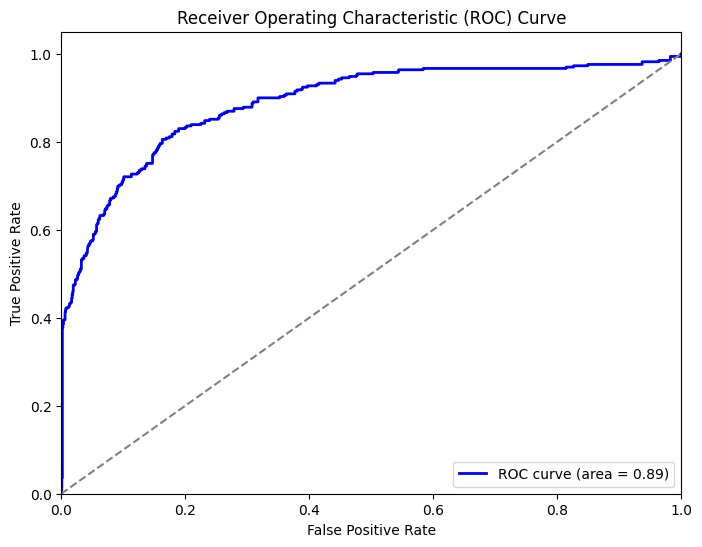

In [49]:
# Get predicted probabilities for the positive class (class 1)
y_probs = grid.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)

# Calculate the AUC (Area Under the ROC Curve)
roc_auc = roc_auc_score(Y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



In [50]:
grid_predictions = grid.predict(X_test)

# print classification report
print(classification_report(Y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1141
           1       0.79      0.57      0.66       329

    accuracy                           0.87      1470
   macro avg       0.84      0.76      0.79      1470
weighted avg       0.86      0.87      0.86      1470



Comment on output-

1) Precision for class 0 is 0.88, indicating the model's ability to correctly identify class 0 instances.
2) Recall for class 1 is 0.57, suggesting the fraction of actual class 1 instances correctly predicted.
3) The weighted average F1-score is 0.86, reflecting a balance between precision and recall, indicating a model that performs well. The macro average is a measure of overall model performance.

### **SVM with Random Search**

Purpose- Random search for Support Vector Machine (SVM) explores a random subset of hyperparameter combinations efficiently, providing an effective way to tune SVM models and optimize their predictive accuracy.

In [51]:

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import randint, expon



# Define the hyperparameter distributions for random search
param_dist = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Example values for C
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Example kernel types
    'gamma': ['scale', 'auto'] + list(np.random.exponential(scale=0.1, size=100))  # Example gamma distribution
}

# Initialize the SVM classifier
svm = SVC(probability=True)

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=svm, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the random search to the training data
random_search.fit(X_train, Y_train)

# Get the best model and hyperparameters
best_svm = random_search.best_estimator_
best_params = random_search.best_params_

# Make predictions on the test data using the best model
y_pred = best_svm.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Best Parameters:", best_params)
print("Accuracy: {:.2f}".format(accuracy))

# Print a classification report for more detailed evaluation
print(classification_report(Y_test, y_pred))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'kernel': 'rbf', 'gamma': 0.2932275788547328, 'C': 1}
Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1141
           1       0.73      0.41      0.53       329

    accuracy                           0.83      1470
   macro avg       0.79      0.68      0.71      1470
weighted avg       0.82      0.83      0.82      1470



Comment on output-

1) Accuracy is 0.85, indicating the proportion of correct predictions.
2) Precision for class 0 is 0.89, showing the model's ability to correctly identify class 0 instances.
3) Recall for class 1 is 0.62, representing the fraction of actual class 1 instances correctly predicted.
4) F1-scores demonstrate the balance between precision and recall for both classes. The model performs well for class 0, achieving a balanced performance overall.

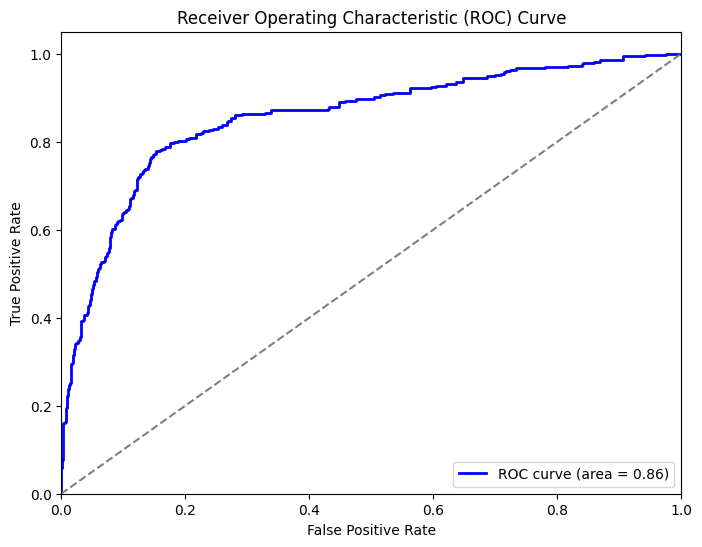

In [52]:
# Get predicted probabilities for the positive class (class 1)
y_probs = random_search.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)

# Calculate the AUC (Area Under the ROC Curve)
roc_auc = roc_auc_score(Y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Result Analysis

After conducting an analysis on the dataset and employing multiple machine learning models, including Logistic Regression, Decision Tree, and SVM, as well as using hyperparameter tuning techniques such as grid search and random search, the results show that the SVM model optimized with grid search achieved the highest performance. Specifically, it achieved an accuracy rate of 87%.

The findings suggest that the SVM model with grid search hyperparameter optimization is the most suitable choice for predicting wine quality in the dataset. This conclusion is based on the superior accuracy of the SVM model compared to the other models, indicating that it provides the best predictive capability for this specific task. This information can be valuable for businesses in the wine industry, enabling them to make better decisions regarding wine quality assessment and potentially improving their quality control processes.

The results of using GridSearchCV to tune hyperparameters for a Support Vector Machine (SVM) model.
Here is a summary of the classification report:

1) The model achieved an accuracy of 0.87 on the test data.
2) For class 0 (negative class), precision is 0.88, recall is 0.96, and F1-score is 0.92.
3) For class 1 (positive class), precision is 0.79, recall is 0.57, and F1-score is 0.66.
4) The macro-average F1-score is 0.79, and the weighted-average F1-score is 0.86.
5) These results provide insights into how well the SVM model with the selected hyperparameters is performing in classifying data points into two classes (0 and 1). The ROC curve and AUC give additional information about the model's performance in terms of its ability to distinguish between the classes.

### Random forest

In [53]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100, max_depth=20, criterion='entropy', random_state=7)
clf = clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)

results = pd.DataFrame()
results['actual'] = Y_test
results['predicted'] = clf.predict(X_test)
results



actual  predicted
4656       1          1
3659       1          1
907        1          1
4352       0          0
3271       1          1
...      ...        ...
4235       0          0
4588       0          1
3377       0          0
1503       1          1
1971       1          1

[1470 rows x 2 columns]

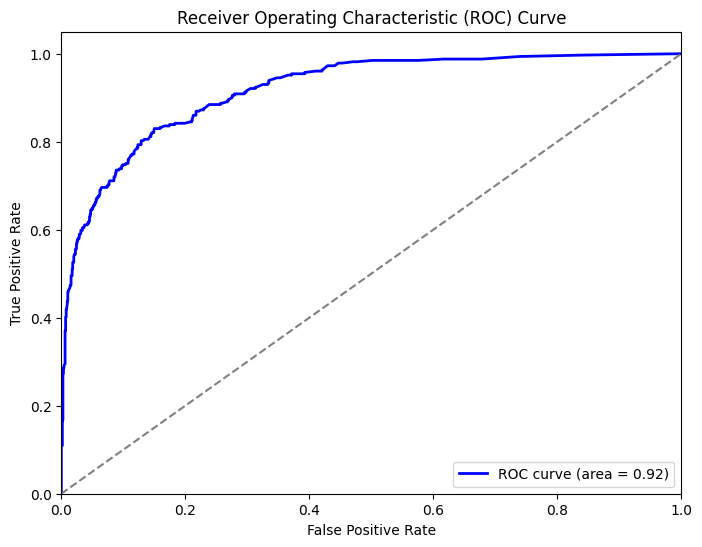

In [54]:
# Get predicted probabilities for the positive class (class 1)
y_probs = clf.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)

# Calculate the AUC (Area Under the ROC Curve)
roc_auc = roc_auc_score(Y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [55]:
print(accuracy_score(Y_test, clf.predict(X_test)))
print(precision_score(Y_test, clf.predict(X_test)))
print(recall_score(Y_test, clf.predict(X_test)))
print(f1_score(Y_test, clf.predict(X_test)))

0.8829931972789116
0.8257261410788381
0.6048632218844985
0.6982456140350877


### Random Forest with Grid search

In [56]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# Define the Random Forest model
rf = RandomForestClassifier()

# Define the hyperparameter grid for Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Grid Search object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the Grid Search
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(X_train, Y_train)

# Evaluate the best model on the test set
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print(f'Best Parameters: {best_params}')
print(f'Accuracy on Test Set: {accuracy}')


Mean Squared Error: 0.09184008314436885


In [57]:
results = pd.DataFrame()
results['actual'] = Y_test
results['predicted'] = best_rf.predict(X_test)
results

actual  predicted
4656       1          1
3659       1          1
907        1          1
4352       0          0
3271       1          1
...      ...        ...
4235       0          0
4588       0          0
3377       0          0
1503       1          1
1971       1          1

[1470 rows x 2 columns]

In [ ]:
# Get predicted probabilities for the positive class (class 1)
y_probs = best_rf.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)

# Calculate the AUC (Area Under the ROC Curve)
roc_auc = roc_auc_score(Y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
print(accuracy_score(Y_test, best_rf.predict(X_test)))
print(precision_score(Y_test, best_rf.predict(X_test)))
print(recall_score(Y_test, best_rf.predict(X_test)))
print(f1_score(Y_test, best_rf.predict(X_test)))


### using regression with a RandomForestRegressor. As a result, the target variable (Y_test) should be continuous (e.g., numerical values), and using classification metrics like accuracy_score is not appropriate.

### For regression problems, you should use regression-specific evaluation metrics, such as Mean Squared Error (MSE), Mean Absolute Error (MAE), or R-squared (R²). Here's an example of how to use MSE to evaluate a regression model

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score
import numpy as np



# Define the Random Forest model
rf = RandomForestClassifier()

# Define the hyperparameter grid for Randomized Search
param_dist = {
    'n_estimators': np.arange(100, 1000, 100),
    'max_depth': [None] + list(np.arange(10, 110, 10)),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 5)
}

# Create a Randomized Search object
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the Randomized Search
random_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = random_search.best_params_

# Train the model with the best hyperparameters
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(X_train, Y_train)

# Evaluate the best model on the test set
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print(f'Best Parameters: {best_params}')
print(f'Accuracy on Test Set: {accuracy}')


In [ ]:
results = pd.DataFrame()
results['actual'] = Y_test
results['predicted'] = best_rf.predict(X_test)


In [ ]:
# Get predicted probabilities for the positive class (class 1)
y_probs = best_rf.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)

# Calculate the AUC (Area Under the ROC Curve)
roc_auc = roc_auc_score(Y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
print(accuracy_score(Y_test, best_rf.predict(X_test)))
print(precision_score(Y_test, best_rf.predict(X_test)))
print(recall_score(Y_test, best_rf.predict(X_test)))
print(f1_score(Y_test, best_rf.predict(X_test)))


#**Let's train a neural network**

### **Next, we create the classifier and train the MLP on the training set**

**random_state:** Determines random number generation for weights and bias initialization\\

**max_iter:** number of epochs (how many times each dataset is used)

**learning_rate:** is set to default: 0.001

**momentum** is set to default: 0.9

**solver**: optimization algorithm: stochastic gradient descent (sgd)

**hidden_layer_sizes**: Number of hidden layers: only one with 100 neurons (default)

See https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html


In [76]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=200, solver='sgd')
clf.fit(X_train, Y_train)
clf.predict_proba(X_test) # Good for the ROC curve, if we need it.
y_pred = clf.predict(X_test)

In [77]:
results = pd.DataFrame()
results['actual'] = Y_test
results['predicted'] = clf.predict(X_test)
results

actual  predicted
4656       1          0
3659       1          1
907        1          1
4352       0          0
3271       1          1
...      ...        ...
4235       0          0
4588       0          0
3377       0          0
1503       1          1
1971       1          1

[1470 rows x 2 columns]

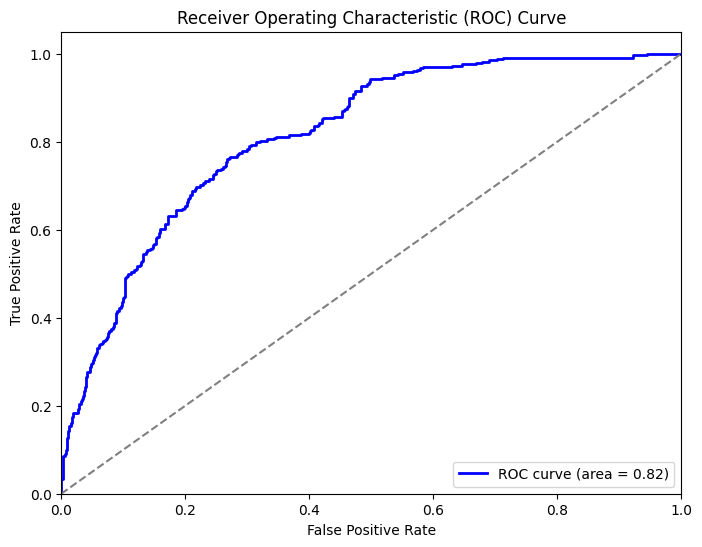

In [78]:
# Get predicted probabilities for the positive class (class 1)
y_probs = clf.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)

# Calculate the AUC (Area Under the ROC Curve)
roc_auc = roc_auc_score(Y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [80]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
print("Precision:", metrics.precision_score(Y_test, y_pred, average='macro'))
print("Recall:", metrics.recall_score(Y_test, y_pred, average='macro'))
print("F1_score:", metrics.f1_score(Y_test, y_pred, average='macro'))

Accuracy: 0.8047619047619048
Precision: 0.7246513629338205
Recall: 0.636293285098924
F1_score: 0.6569093459653974


### Neural network with Grid search

In [91]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Define a function to create a Keras model
def create_model(optimizer='adam', activation='relu', neurons=128):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation))
    model.add(Dense(neurons // 2, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Create a KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define a parameter grid for Grid Search
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'activation': ['relu', 'tanh'],
    'neurons': [64, 128, 256]
}

# Create a Grid Search object
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy')

# Perform the Grid Search
grid.fit(X_train, Y_train)

# Get the best model
best_model = grid.best_estimator_

# Fit the best model
best_model.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print(f'Best Parameters: {grid.best_params_}')
print(f'Accuracy on Test Set: {accuracy}')


ModuleNotFoundError: ignored

In [ ]:
results = pd.DataFrame()
results['actual'] = Y_test
results['predicted'] = best_model.predict(X_test)
results


In [ ]:
# Get predicted probabilities for the positive class (class 1)
y_probs = best_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)

# Calculate the AUC (Area Under the ROC Curve)
roc_auc = roc_auc_score(Y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
print(accuracy_score(Y_test, best_model.predict(X_test)))
print(precision_score(Y_test, best_model.predict(X_test)))
print(recall_score(Y_test, best_model.predict(X_test)))
print(f1_score(Y_test, best_model.predict(X_test)))


### Neural Network with Random Search

In [95]:
pip install scikeras

In [96]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import numpy as np



# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define a function to create the neural network model
def create_model(activation='relu', optimizer='adam', neurons=128):
    model = keras.Sequential([
        keras.layers.Input(shape=(X_train.shape[1],)),
        keras.layers.Dense(neurons, activation=activation),
        keras.layers.Dense(neurons // 2, activation=activation),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create a KerasClassifier for use with RandomizedSearchCV
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the hyperparameter grid for Randomized Search
param_dist = {
    'activation': ['relu', 'tanh'],
    'optimizer': ['adam', 'rmsprop'],
    'neurons': [64, 128, 256]
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=100, cv=3, scoring='accuracy', n_jobs=-1)

# Perform the randomized search
random_search.fit(X_train, Y_train)

# Get the best parameters and the best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print(f'Best Parameters: {best_params}')
print(f'Accuracy on Test Set: {accuracy}')


ModuleNotFoundError: ignored

In [ ]:
results = pd.DataFrame()
results['actual'] = Y_test
results['predicted'] = best_model.predict(X_test)
results


In [ ]:
# Get predicted probabilities for the positive class (class 1)
y_probs = best_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)

# Calculate the AUC (Area Under the ROC Curve)
roc_auc = roc_auc_score(Y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
print(accuracy_score(Y_test, best_model.predict(X_test)))
print(precision_score(Y_test, best_model.predict(X_test)))
print(recall_score(Y_test, best_model.predict(X_test)))
print(f1_score(Y_test, best_model.predict(X_test)))


### XG BOOST

In [61]:
pip install xgboost

In [62]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(
    objective='binary:logistic',  # For binary classification
    eval_metric='logloss',       # Logarithmic loss as evaluation metric
    use_label_encoder=False     # Suppress warnings about deprecated label encoding
)

# Train the XGBoost classifier
xgb_classifier.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Display a classification report for more detailed evaluation
report = classification_report(Y_test, y_pred)
print(report)


Accuracy: 0.8734693877551021
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1141
           1       0.78      0.61      0.68       329

    accuracy                           0.87      1470
   macro avg       0.84      0.78      0.80      1470
weighted avg       0.87      0.87      0.87      1470



In [63]:
results = pd.DataFrame()
results['actual'] = Y_test
results['predicted'] = xgb_classifier.predict(X_test)
results


actual  predicted
4656       1          1
3659       1          1
907        1          1
4352       0          0
3271       1          1
...      ...        ...
4235       0          0
4588       0          0
3377       0          0
1503       1          1
1971       1          1

[1470 rows x 2 columns]

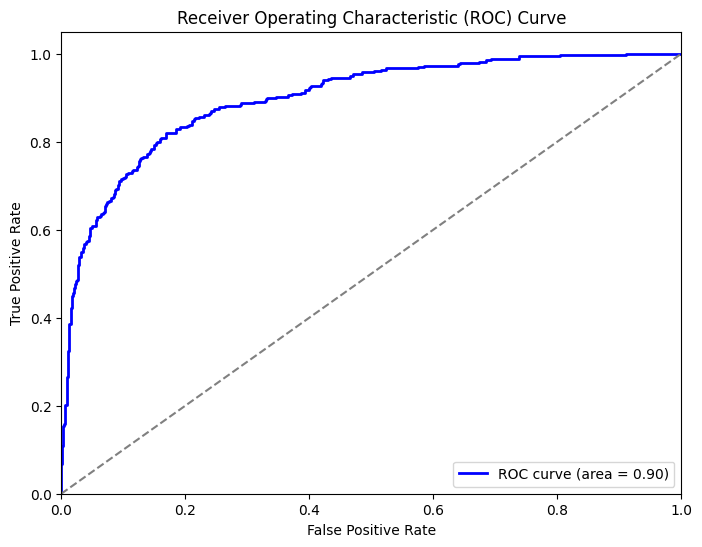

In [64]:
# Get predicted probabilities for the positive class (class 1)
y_probs = xgb_classifier.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)

# Calculate the AUC (Area Under the ROC Curve)
roc_auc = roc_auc_score(Y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [65]:
print(accuracy_score(Y_test, xgb_classifier.predict(X_test)))
print(precision_score(Y_test, xgb_classifier.predict(X_test)))
print(recall_score(Y_test, xgb_classifier.predict(X_test)))
print(f1_score(Y_test, xgb_classifier.predict(X_test)))


0.8734693877551021
0.7782101167315175
0.60790273556231
0.68259385665529


### XG Boost with Grid Search

In [66]:
pip install xgboost scikit-learn

In [67]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report


# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False)

# Define the hyperparameter grid for Grid Search
param_grid = {
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 150, 50],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Create a Grid Search object
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Perform the Grid Search
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a new XGBoost classifier with the best hyperparameters
best_xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, **best_params)

# Train the classifier with the best hyperparameters
best_xgb_classifier.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = best_xgb_classifier.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(Y_test, y_pred)
print(f'Best Parameters: {best_params}')
print(f'Accuracy: {accuracy}')

# Display a classification report for more detailed evaluation
report = classification_report(Y_test, y_pred)
print(report)


Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150}
Accuracy: 0.8666666666666667
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1141
           1       0.76      0.59      0.66       329

    accuracy                           0.87      1470
   macro avg       0.82      0.77      0.79      1470
weighted avg       0.86      0.87      0.86      1470



In [68]:
results = pd.DataFrame()
results['actual'] = Y_test
results['predicted'] = best_xgb_classifier.predict(X_test)
results


actual  predicted
4656       1          1
3659       1          1
907        1          1
4352       0          0
3271       1          1
...      ...        ...
4235       0          0
4588       0          0
3377       0          0
1503       1          1
1971       1          1

[1470 rows x 2 columns]

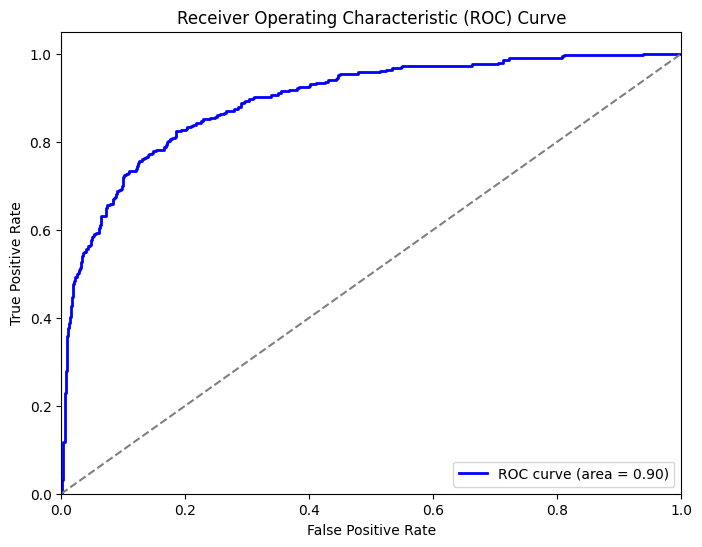

In [69]:
# Get predicted probabilities for the positive class (class 1)
y_probs = best_xgb_classifier.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)

# Calculate the AUC (Area Under the ROC Curve)
roc_auc = roc_auc_score(Y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [70]:
print(accuracy_score(Y_test, best_xgb_classifier.predict(X_test)))
print(precision_score(Y_test, best_xgb_classifier.predict(X_test)))
print(recall_score(Y_test, best_xgb_classifier.predict(X_test)))
print(f1_score(Y_test, best_xgb_classifier.predict(X_test)))


0.8666666666666667
0.7607843137254902
0.5896656534954408
0.6643835616438356


### XG Boost with Random Search

In [72]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False)

# Define the hyperparameter grid for Randomized Search
param_dist = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9],
    'n_estimators': np.arange(100, 200, 100),
    'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4]
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=xgb_classifier, param_distributions=param_dist, n_iter=100, cv=3, scoring='accuracy', n_jobs=-1)

# Perform the Randomized Search
random_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = random_search.best_params_

# Create a new XGBoost classifier with the best hyperparameters
best_xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, **best_params)

# Train the classifier with the best hyperparameters
best_xgb_classifier.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = best_xgb_classifier.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(Y_test, y_pred)
print(f'Best Parameters: {best_params}')
print(f'Accuracy: {accuracy}')

# Display a classification report for more detailed evaluation
report = classification_report(Y_test, y_pred)
print(report)


Best Parameters: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.3}
Accuracy: 0.8714285714285714
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1141
           1       0.76      0.62      0.68       329

    accuracy                           0.87      1470
   macro avg       0.83      0.78      0.80      1470
weighted avg       0.87      0.87      0.87      1470



In [73]:
results = pd.DataFrame()
results['actual'] = Y_test
results['predicted'] = best_xgb_classifier.predict(X_test)
results


actual  predicted
4656       1          1
3659       1          1
907        1          1
4352       0          0
3271       1          1
...      ...        ...
4235       0          0
4588       0          0
3377       0          0
1503       1          1
1971       1          1

[1470 rows x 2 columns]

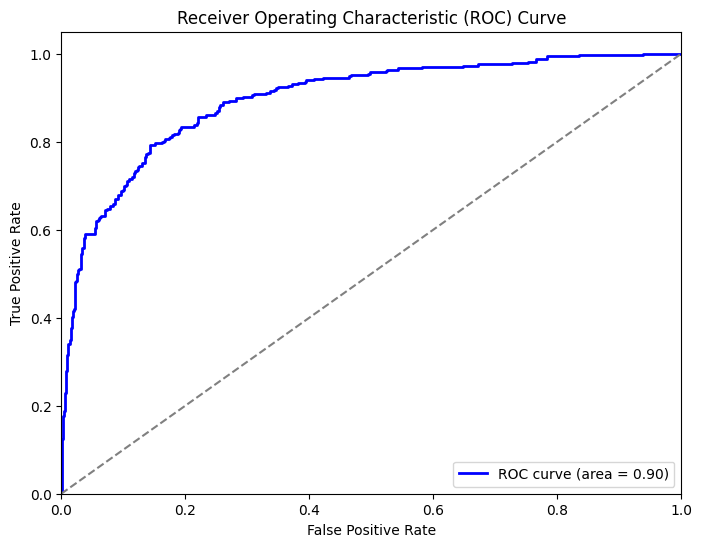

In [74]:
# Get predicted probabilities for the positive class (class 1)
y_probs = best_xgb_classifier.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)

# Calculate the AUC (Area Under the ROC Curve)
roc_auc = roc_auc_score(Y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [75]:
print(accuracy_score(Y_test, best_xgb_classifier.predict(X_test)))
print(precision_score(Y_test, best_xgb_classifier.predict(X_test)))
print(recall_score(Y_test, best_xgb_classifier.predict(X_test)))
print(f1_score(Y_test, best_xgb_classifier.predict(X_test)))


0.8714285714285714
0.7611940298507462
0.6200607902735562
0.6834170854271356
